# Computer Vision  : Image Classifcation
# NLP: Natural Language Processing: Text Classification


In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
len(train_data[1])

189

In [4]:
train_labels.shape

(25000,)

In [26]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
type(train_data[0])

list

In [30]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [32]:
imdb.get_word_index()['brilliant']

527

In [34]:
imdb.get_word_index()['more']

50

In [36]:
len(imdb.get_word_index())

88584

In [38]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [40]:
reverse_word_index.get(1408)

'woods'

In [42]:
# # d = {'fawn': 34701,
#  'tsukino': 52006,
#  'nunnery': 52007,
#  'sonja': 16816,
#  'vani': 63951}

In [44]:
# dict([(v,k) for k,v in d.items()])

In [46]:
# d['vani']

In [48]:
# d.get('vanii', 'value not found')

In [50]:
# decoded_review

In [52]:
# reverse_word_index.get(43)

In [54]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [56]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [57]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [58]:
x_train[0].sum()

120.0

In [59]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [60]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
                            layers.Dense(16, activation="relu"),
                            layers.Dense(16, activation="relu"),
                            layers.Dense(1, activation="sigmoid")
                        ])

In [65]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

## Simple Hold Out Validation

In [69]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [71]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.7829 - loss: 0.5272 - val_accuracy: 0.8598 - val_loss: 0.4112
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8909 - loss: 0.3344 - val_accuracy: 0.8686 - val_loss: 0.3350
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9157 - loss: 0.2494 - val_accuracy: 0.8836 - val_loss: 0.2936
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9322 - loss: 0.2030 - val_accuracy: 0.8886 - val_loss: 0.2796
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9433 - loss: 0.1702 - val_accuracy: 0.8883 - val_loss: 0.2791
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9541 - loss: 0.1449 - val_accuracy: 0.8857 - val_loss: 0.2873
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9610 - loss: 0.1257 - val_accuracy: 0.8868 - val_loss: 0.2898
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9663 - loss: 0.1096 - val_accuracy: 0.8840 - 

In [72]:
history_dict = history.history

In [73]:
import pandas as pd

In [74]:
pd.DataFrame(history_dict)

,accuracy,loss,val_accuracy,val_loss
0,0.782867,0.527169,0.8598,0.411231
1,0.890867,0.334415,0.8686,0.335021
2,0.915667,0.249365,0.8836,0.293587
3,0.932200,0.202987,0.8886,0.279553
4,0.943333,0.170230,0.8883,0.279115
5,0.954067,0.144858,0.8857,0.287288
6,0.961000,0.125660,0.8868,0.289834
7,0.966333,0.109594,0.8840,0.304492
8,0.973667,0.093469,0.8823,0.315352
9,0.977000,0.080994,0.8749,0.341982


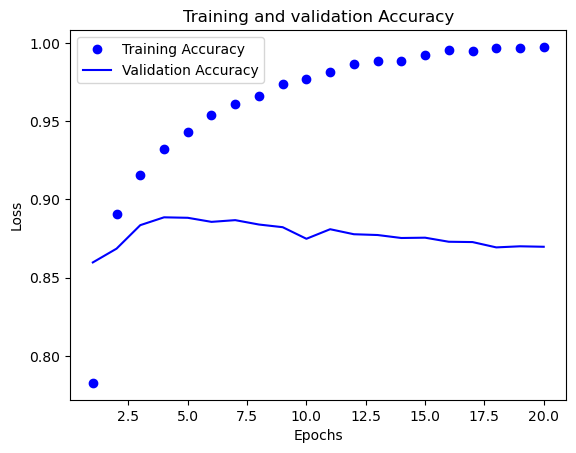

In [75]:
import matplotlib.pyplot as plt

loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_loss_values, "b", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

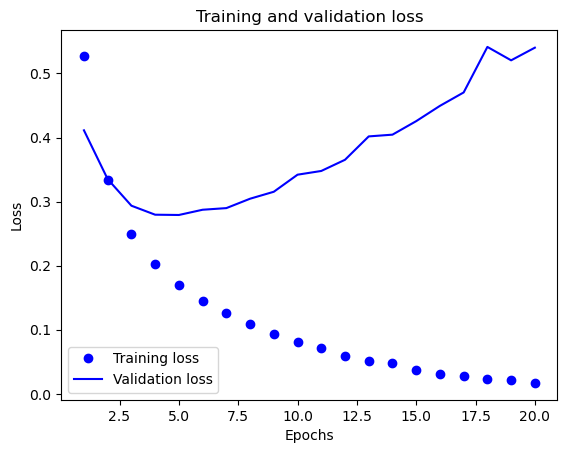

In [76]:
import matplotlib.pyplot as plt

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [81]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [78]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7838 - loss: 0.5136
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9003 - loss: 0.3120
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9215 - loss: 0.2349
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9375 - loss: 0.1909
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8872 - loss: 0.2864


In [79]:
for p in model.predict(x_test):
    if p >=0.5:
        print("Positvie")
    else:
        print("Negative")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Negative
Positvie
Positvie
Positvie
Positvie
Positvie
Positvie
Negative
Positvie
Positvie
Positvie
Negative
Negative
Negative
Positvie
Negative
Positvie
Positvie
Negative
Negative
Positvie
Positvie
Negative
Positvie
Positvie
Positvie
Negative
Positvie
Positvie
Negative
Positvie
Negative
Positvie
Negative
Negative
Negative
Positvie
Positvie
Negative
Negative
Positvie
Positvie
Negative
Positvie
Positvie
Positvie
Negative
Negative
Negative
Negative
Negative
Negative
Positvie
Positvie
Positvie
Negative
Positvie
Positvie
Negative
Positvie
Negative
Negative
Positvie
Negative
Negative
Positvie
Negative
Positvie
Positvie
Positvie
Positvie
Positvie
Positvie
Negative
Negative
Negative
Negative
Positvie
Positvie
Negative
Positvie
Negative
Positvie
Positvie
Negative
Negative
Negative
Positvie
Negative
Positvie
Positvie
Positvie
Negative
Positvie
Positvie
Negative
Positvie
Positvie
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negat